# Instruções gerais

Para executar uma CÉLULA, pressione o botão "Run" no topo, com a CÉLULA selecionada, ou pressione:
    
    Shift + Enter

EXECUTE APENAS UMA CÉLULA POR VEZ

-Caso deseje apagar a saída de uma célula carregada, mas não deseje carregar uma nova saída, vá à aba superior, escolha o ícone
do teclado (open the command palette/ jupyter-notebook command group) e selecione clear cell output.

@author: Marco César Prado Soares, MSc.
Especialista Lean Six Sigma Master Black Belt, Eng. Químico, MSc. Eng. Mecatrônica (instrumentação) 
Marco.Soares@br.ey.com; marcosoares.feq@gmail.com

# Regressão Logística
## Problema Classificatório
### Template 1: apenas 1 variável preditora
#### Credit Analysis

Muitas situações apresentam como resultado uma probabilidade. Por exemplo, um determinado evento pode ou não ocorrer (a resposta é binária). Estes problemas envolvem uma série de situações práticas do dia-a-dia, e são fundamentais na análise de riscos. Eles são chamados problemas classificatórios ou problemas de classificação.

A regressão logística pertence a uma classe maior de algoritmos de Machine Learning chamada de modelos lineares.
(https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression%202/9)

Começaremos com o caso mais simples. Nosso objetivo é saber se, dada a renda de uma pessoa, se ela possui ou não cartão de crédito. Assim, devemos construir o modelo Machine Learning a partir de um dataset que apresenta apenas 3 colunas: 

•	Um identificador da entrada que não deve fazer parte da análise, uma vez que não apresenta qualquer relação com o resultado. Incluir esta coluna significa dizer ao sistema que o número com o qual a pessoa foi registrada determina se ela tem ou não cartão. Isto não só não faz sentido, como piora os resultados, já que o número apenas cresce à medida que as pessoas são registradas;
•	Coluna CARTAO: indica se a pessoa possui cartão de crédito (s); ou se não possui cartão de crédito (n);
•	Coluna Renda: indica a renda familiar.

O objetivo, portanto, é avaliar se o fato de uma pessoa possuir ou não cartão de crédito pode ser explicado pela sua renda familiar. Veremos neste exercício que a Renda é de fato significativa para que a família tenha cartão de crédito.
 
- Pergunta: seu chefe lhe enviou o pedido que ofereça o cartão a um indivíduo, que acabou de abrir conta no banco, mas para poupar tempo, você deve usar o modelo de inteligência artificial/regressão logística e verificar se a pessoa já deve ou não possuir cartão de crédito. Caso ela já possua, você analisará outras pessoas. 

No cadastro, o indivíduo afirma que sua renda familiar é de R$ 1050,27. Este indivíduo deve ou não possuir cartão? 

O objetivo, portanto, é avaliar se o fato de uma pessoa possuir ou não cartão de crédito pode ser explicado pela sua renda familiar.

In [ ]:
#Carregue o dataset:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
#Step 1. Import the model you want to use
#In sklearn, all machine learning models are implemented as Python classes
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

caminho = "D:\Drive\FM2S\EAD\Green Belt em Python\Machine Learning - módulo 1 - Regressão Logística\Reg.log.1 - credit analysis - one_factor\dataset-reg_log.xlsx"
dataset = pd.read_excel(caminho)

Repare que este dataset já possui uma variável binária numérica associada à pessoa ter ou não cartão de crédito: trata-se do CARTAO_COD, que apresenta valor igual a 1 quando “sim, tem cartão” (valor “s”), e é igual a zero quando a pessoa não tem cartão (valor “n”).

Caso a base de dados não possuísse a variável numérica, esta teria que ser criada.

LEMBRE-SE: Antes de utilizar os algoritmos de Machine Learning, crie variáveis numéricas associadas a cada uma das variáveis classificatórias. Se a variável classificatória for binária, forneça como valores zero ou 1, para facilitar o trabalho matemático. Caso seja uma variável contável, forneça um número natural correspondente a cada classificação (fica a seu critério começar a contagem em zero ou 1). Por exemplo, suponha que a pessoa more em um de quatro bairros, A, B, C, D. Podemos criar uma variável que é igual a 1 para o bairro A; 2, para B; 3, para C; e 4, para D.

In [ ]:
"""Outra questão importante na etapa de limpeza e preparação dos dados 
é a necessidade de eliminar linhas com entradas nulas, as quais impediriam a 
construção do modelo de Machine Learning. Para isso:"""

#It is important to clean the dataset before analyzing it, eliminating
#possible null entries - the Machine Learning model cannot work with such
#null values
dataset = dataset.dropna(axis=0)


# NOTA: 
Caso houvesse colunas em particular com várias entradas nulas, sendo que essas colunas não são realmente relevantes para o modelo que se deseja construir, o ideal seria: selecionar apenas as colunas desejadas para o modelo e, somente então, fazer a limpeza dos dados. Isto evitaria que várias linhas com informações relevantes fossem eliminadas pelo processo de limpeza (dropna). Repare que fazemos isso antes de selecionar os dataframes X e y (próxima etapa) para garantir que as mesmas entradas (linhas) de X e y sejam removidas e para que não haja discordância entre os números de entradas e índices das linhas dos dois dataframes.

In [ ]:
"""Agora, precisamos selecionar as variáveis do nosso modelo. 
Chamaremos de X a variável preditora e de y a variável resposta. X será a renda, enquanto y será a variável binária 
numérica associada a possuir ou não o cartão (mais uma vez, temos que fornecer variáveis numéricas).
"""
X = dataset['RENDA']
#X deve ser bidimensional: tem o identificador da variavel e o valor dela
#propriamente dito
y = dataset['CARTAO_COD']

O comentário evidencia o problema nesta situação: o algoritmo da scikit-learn exige pelo menos duas variáveis preditoras. Como isso não ocorre, usaremos alguns comandos numpy para converter a coluna única (Renda) em um formato aceito. Note, estes comandos numpy (np) só serão utilizados quando trabalharmos com uma única variável preditora, um caso bastante incomum na prática. Nos próximos exercícios, veremos que isso não é necessário (e nem deve ser feito), pois existe mais de uma variável.

Como dito no documento do enunciado, não ceda à tentação de simplesmente definir X como um dataframe contendo a coluna ‘OBS’ juntamente com a coluna ‘RENDA’! Ao fazer isso, você estará informando ao algoritmo que a coluna ‘OBS’ é uma variável preditora, ou seja, o número da observação define se a pessoa terá ou não cartão de crédito.

Obviamente, não há sentido nisso, pois a variável ‘OBS’ é simplesmente um identificador de entrada, assim como o índice da linha, e cresce sempre, de uma em uma unidade. O algoritmo tentaria, então, encontrar uma correlação entre o crescimento deste identificador e o fato de existir ou não cartão. Repare que, mesmo que os dados fossem fornecidos aleatoriamente à base, isso por si só seria capaz de fazer o modelo perder capacidade de predizer os resultados. 

No nosso caso é ainda pior, pois os dados foram registrados de forma segregada: primeiramente, foram registradas as pessoas que possuem cartão para, a seguir, registrar-se as que não possuem. Logo, como todas as pessoas que não possuem cartão são registradas posteriormente, o modelo poderia facilmente interpretar que o aumento de “OBS” resulta em menor probabilidade de possuir cartão.

# 1. Divisão e aleatorização dos dados 

O modelo de inteligência artificial deve ser treinado. Isso significa que fornecemos um determinado conjunto de dados ao algoritmo. 
O algoritmo, então, “aprende” com aqueles dados, buscando encontrar um padrão (o modelo), y = f(X). Como podemos saber, então, se o modelo “aprendido” é satisfatório?

Para avaliar se o modelo é satisfatório, precisamos testar o algoritmo. Logicamente, se usarmos todos os dados disponíveis para regredir o modelo, não sobrarão dados para testá-lo. Sendo assim, precisamos dividir os dados da variável de predição (X), juntamente com os dados da variável resposta correspondente (y) em dois conjuntos:
•	Um conjunto, geralmente com maior volume de dados, que será usado para treinar o algoritmo, de modo que ele encontre o padrão desejado;
•	Um segundo conjunto que será utilizado para testar se aquele modelo é confiável.

Aqui é interessante notar que esta divisão deve ser aleatória. Isto porque a base de dados pode ter sido construída com um padrão, como é o caso aqui, no qual os dados das pessoas que possuem cartão foram inseridos antes. Assim, imagine que você dividisse a base tomando os últimos elementos para teste, e os anteriores para treino. Se a base foi construída de forma segregada, poderia ocorrer de o seu algoritmo ser treinado apenas para uma das populações, e testado apenas para a outra, obtendo resultados muito ruins.

De outra forma (menos genérico e mais contextualizado no presente problema): tomando apenas os primeiros resultados, seu algoritmo será treinado apenas para uma população com resultado 1 (ou seja, as pessoas que possuem cartão). Assim, ele não terá informações para “aprender” quando deve prever que o resultado seja zero (se ele nunca “observou” uma pessoa sem cartão de crédito, ele não saberá identifica-la adequadamente). Porém, no teste, os resultados que ele previu apenas “conhecendo” o resultado 1 serão confrontados com uma população constituída apenas por zeros (pessoas sem cartão), com vários resultados preditos não se confirmando.

Assim, não podemos usar a função Split do numpy, que divide as listas em posições definidas. Usaremos uma função da sklearn que: (1) define quantos elementos terão em cada conjunto, treino e teste; (2) seleciona aleatoriamente elementos dos dados originais até completar os novos conjuntos, treino e teste (realiza uma divisão aleatória).


In [ ]:
#Funcao para dividir os dados (split em treino e teste)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#test_size: proportion: 0.25 used for test
#test_size = 0.25 = 25% of data used for tests 
#-> then, 0.75 = 75% of data used for training the Machine Learning model

Repare o que este comando informa:
•	Do lado direito, criamos uma variável x_train (treino) e x_test (teste) a partir da divisão da variável X, à direita (as duas primeiras variáveis são resultado da divisão da primeira variável entre parênteses);
•	Veremos nos próximos exemplos que X tanto pode ser uma variável (coluna única), como um dataframe composto pelas diversas variáveis de predição (ou seja, a função train_test_split divide tanto colunas quanto dataframes).
•	Também criamos as variáveis y_train (treino) e y_test (teste) à esquerda a partir da divisão da variável y à direita, onde y é a segunda variável entre parênteses (mesmo que X seja um dataframe, esta ordem não se altera).
•	Embora outros nomes possam ser usados para as variáveis, é altamente recomendável que você mantenha essa consistência de nomenclaturas e de ordens, evitando confusões nas etapas seguintes, e evitando confundir as variáveis com parâmetros ou funções utilizadas nos modelos de inteligência artificial.
•	Assim, usaremos sempre esta mesma notação básica e essa ordem.
•	O comando test_size indica a fração de dados que serão utilizadas para o teste (o tamanho das variáveis de teste). Assim, test_size = 0.25 indica que 0,25 = 1/4 do total dos dados (25% dos dados) são reservados para os testes, enquanto que 75% dos dados (3/4) são reservados para treinar o modelo.
•	Repare que a ordem aqui é extremamente importante: x_train e y_train armazenarão 75% dos dados das variáveis preditoras e respostas, respectivamente. Por isso, mantenha sempre esta ordem e a consistência da nomenclatura.

### NOTA: 
repare que as regressões que vimos até aqui, como as regressões lineares e as regressões múltiplas, utilizam o conjunto de dados completo para regredir o modelo (os dados não são divididos em treino e teste). O mesmo ocorre com os algoritmos do Minitab e do Real Statistics for Excel, baseados na maximização da verossimilhança, e com outros ajustes de funções genéricas baseados no método dos mínimos quadrados.

Como mencionado no texto do enunciado, isto pode gerar alguns problemas, em especial: o custo computacional (o que dificulta o trabalho com grandes bases de dados); e o elevado grau de não-linearidade de determinados problemas (o que se intensifica à medida que cresce o número de variáveis preditoras), dificultando a convergência (ou seja, o algoritmo não encontra uma resposta).

Além de impedir estas situações, o uso do algoritmo de Machine Learning também previne que ocorram dois problemas muito graves:

Overfitting: esta é uma situação na qual os dados representam ou se assemelham muito aos dados de treinamento, mas não representam bem um modelo generalizado. Assim, a comparação com os dados de teste não resulta em bons resultados.

Quando não são reservados dados para o treinamento, como feito nas regressões por mínimos quadrados, o risco de overfitting aumenta. Uma consequência do overfitting, por sua vez, é que o modelo não responde ou não se adapta bem a pequenas mudanças dos dados. A substituição de alguns pontos experimentais, por exemplo, poderia gerar um modelo completamente diferente, ou resultar em predição com erro muito elevado. 

Uma analogia simples que permite visualizar o overfitting é imaginar uma típica situação universitária ou mesmo de escola: o aluno, ao invés de aprender o raciocínio, simplesmente decora os exercícios da lista preparatória (ou as respostas deles). Quando recebe o exame, descobre que o professor fez várias mudanças nos dados dos exercícios, e, então, o aluno obtém um resultado ruim, pois não sabia se adaptar à nova situação. Isto é o overfitting: o modelo mental do aluno conhece profundamente os dados de treino, mas não é capaz de se adaptar à situação na qual os dados de teste são diferentes, e fornecendo respostas bastante distintas do que deveria.

Pensando no caso específico de um modelo linear:

- Em uma reta, muitos pontos coletados em determinada região podem “puxar” o ajuste naquela direção. Isto ocorre principalmente quando é difícil obter dados para determinadas condições (são coletados poucos dados ali). Em outras situações, porém, isto não se verifica, de modo que algumas condições permitem que sejam coletados muito mais dados. Assim, o ajuste passa a representar não todo o espaço amostral, mas sim a região para a qual se obteve mais informações. Isto pode tanto alterar artificialmente a inclinação da regressão como pode deslocar o ajuste para cima ou para baixo, introduzindo erros sistemáticos às previsões.

Underfitting: esta é a situação oposta, na qual o modelo é simples demais para realizar uma boa generalização do fenômeno. Neste caso, obtêm-se baixas precisões tanto para os dados de treinamento quanto para os dados de teste.

Exemplos de underfitting incluem a situação mostrada na figura do texto de enunciado, na qual se verifica que o ajuste de uma situação probabilística por uma regressão linear resulta em um modelo muito ineficiente; ou uma situação que é bem descrita por um polinômio do 5º grau, mas que o analista tenta representar por uma linha reta. 

Neste caso, geralmente existem regiões limitadas do espaço de análise nas quais, de fato, o fenômeno pode ser aproximado localmente por uma reta. Porém, o modelo se torna cada vez mais impreciso à medida que se tenta generalizá-lo ou expandi-lo para outras situações.


# 2. Chamar o modelo 

Nesta etapa, você pode definir o solver que será utilizado para regredir o modelo. As opções disponíveis são: ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’. Para conferir as vantagens e desvantagens de cada um, verifique a página correspondente na documentação da scikit-learn, ou simplesmente mantenha o padrão (solver = ‘lbfgs’): https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression

In [ ]:
#Step 2. Make an instance of the Model
#all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(solver = 'lbfgs')

# 3. Treinar o modelo com os dados de treinamento, e armazenar os resultados do aprendizado 

Nesta etapa, faremos o treinamento propriamente dito do modelo de Machine Learning, e armazenaremos os dados obtidos. Como os comentários a seguir destacam, isto nada mais é do que fazer com que o código aprenda uma relação entre os valores de entrada (x_train) e os correspondentes valores de saída (y_train).

Entretanto, como mencionado anteriormente, o algoritmo da sklearn exige pelo menos duas variáveis preditoras (duas colunas). Neste nosso caso mais simples, porém pouco usual, existe apenas uma variável preditora. Por isso, utilizamos as funções do numpy (np) indicadas como np.array para converter a coluna em um formato que seja trabalhável pelo algoritmo.

Como precisamos manter a coerência dos formatos, modificamos tanto as variáveis x quanto as variáveis y (mais à frente, faremos a mesma coisa para as variáveis de teste). Porém, reforçamos: as funções np.array devem ser usadas apenas no caso especial em que existe uma única variável preditora (um único X). Nos demais casos, quando mais de uma coluna de predição está presente (duas ou mais colunas X, como veremos nos próximos exemplos), não devemos utilizar o np.array.

In [ ]:
#Step 3. Training the model on the data, storing the information 
#learned from the data
#Model is learning the relationship between digits (x_train) 
#and labels (y_train)

#logistic-regression demands at least two columns for the regression
#for a one-dimension correlation (i.e. correlation in relation to a single
#variable: example: income vs probability of paying) you must correct to 
#numpy arrays. Eliminate these next steps if more than one column are present
x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
y_train = np.array(y_train)
y_test = np.array(y_test)

logisticRegr.fit(x_train, y_train)

"""Nesta última linha, você nota que a variável “logisticRegr” é, na verdade, o próprio modelo da 
regressão logística que foi chamado anteriormente. Não mude este nome, a não ser que esteja trabalhando com outro modelo. 
É fundamental manter a coerência da nomenclatura, ou surgirão mensagens de erro.
"""

# 4. Calcular os resultados preditos pelo modelo 

Agora que o modelo aprendeu a relação entre as entradas e as saídas, vamos checar o que ele aprendeu. Para isso, vamos fornecer novamente os valores x de treino, e avaliar qual a resposta y que ele obtém (esperamos que ela seja igual a y de treino).

In [ ]:
#Step 4. Predict labels for new data
#Uses the information the model learned during the model training process
# Returns a NumPy Array
# Predict for One Observation:
#logisticRegr.predict(x_test[0].reshape(1,-1))
#Predict for Multiple Observations at Once:
#logisticRegr.predict(x_test[0:10])

#Make predictions on entire train data
y_pred_train = logisticRegr.predict(x_train)
parameters = logisticRegr.get_params(deep=True)

y_pred_test = logisticRegr.predict(x_test)
#y values predicted for the test data

#Use the function:
#logisticRegr.predict(x_test[0].reshape(1,-1))
#to predict the value of the model for an unknown case
#predict_log_proba(X)
#Predict logarithm of probability estimates.
#predict_proba(X)
#Probability estimates.

Note que criamos uma variável y_pred_train que armazena os resultados que o modelo de regressão logística gera para cada variável de treino x_train. Analogamente, y_pred_test armazena os valores preditos para os dados x_test. A importância disso está no seguinte fato: nenhum modelo é perfeito, e todos os modelos estão sujeitos a falhas, assim como ocorre na regressão linear (pode haver vários pontos fora da reta). O armazenamento dos valores preditos e dos valores de treino, então, nos permitirá avaliar nas etapas seguintes o desempenho do modelo.

Repare que também criamos a variável parameters, que armazenará os parâmetros obtidos para o modelo. Esta variável será um dicionário.

Note nos comentários que nosso modelo já está funcional: 
•	Podemos tomar um indivíduo com um conjunto de características X (variáveis preditoras) e aplicar a regressão logística.
•	O resultado será um valor zero ou 1. 
•	No nosso exemplo, 1 significa que o indivíduo tem cartão de crédito, zero significa que ele não tem cartão de crédito.
•	Logicamente, a regressão estabelece um critério: se há mais de 50% de chances, então o resultado é igual a 1.
•	Os comentários também mostram como fazer para calcular a probabilidade. Principalmente se esta for próxima a 50%, pode ser importante saber a probabilidade para tomar uma decisão.

Suponha que vamos avaliar um indivíduo qualquer, que ocupa a posição i do nosso dataset. O conjunto das variáveis preditoras é, então X[i]. Entretanto, podemos especificar um novo indivíduo, por exemplo, individuo_1 = [] e fornecer a lista de variáveis preditoras dele (caso ele não esteja ainda no dataset). Isso pode ser feito no script ou diretamente no Console.

-Caso 1: existe apenas uma variável preditora. Novamente, temos que fazer uma correção de formato, já que a lista das variáveis possuirá apenas uma linha e uma coluna.
- Cálculo da regressão logística para esse elemento (resultado zero ou 1, possui  ou não possui cartão): yi = logisticRegr.predict(np.array(X[i]).reshape(1,-1)) ou yi = logisticRegr.predict(np.array(individuo_1[0]).reshape(1,-1))

- Cálculo da probabilidade deste elemento: p_yi = predict_proba(np.array(X[i]).reshape(1,-1)) ou p_yi = predict_proba(np.array(individuo_1[0]).reshape(1,-1))

Note que o que importa aqui é não se esquecer de corrigir o formato com a função np.array. A variável yi armazenará o valor de saída: 1 se possui cartão, zero se não possui.

-Caso 2: existe mais de uma variável preditora. Agora não precisamos mais corrigir o formato.
- Cálculo da regressão logística para esse elemento (resultado zero ou 1, possui  ou não possui cartão): yi = logisticRegr.predict(X[i]) ou yi = logisticRegr.predict(individuo_1[0])

- Cálculo da probabilidade deste elemento: p_yi = predict_proba(X[i]) ou p_yi = predict_proba(individuo_1[0])

# 5. Avaliação de desempenho do modelo 

Agora que o algoritmo aprendeu o modelo de correlação, precisamos de uma métrica que avalie o desempenho deste modelo, ou seja, o quão bem ele representa os dados.

Existem diversas métricas de desempenho de um modelo: precisão (“precision”), “recall”, “F1 score”, “ROC curve”, etc. Vamos utilizar a métrica mais simples, a exatidão (“accuracy”, que também pode ser traduzido como precisão). 

A exatidão/precisão do modelo é definida a partir dos resultados do modelo como a (fração de predições corretas) = (número de predições corretas)/(número total de dados usados para teste). Por sua vez, o número de dados é a quantidade de linhas (entradas) do conjunto de dados (lembre-se: as colunas são as variáveis). Podemos definir a precisão tanto em termos do desempenho do modelo com relação à predição para os dados de teste, quanto com relação ao ajuste dos dados de treino.

NOTA: em problemas de classificação, um erro para “um lado” pode ser mais perigoso que o erro “para o outro”. Por exemplo: suponha que você esteja avaliando a probabilidade de um paciente ter câncer. Um diagnóstico de falso negativo (seu modelo resultar em zero, quando deveria ser 1) é altamente perigoso, pois o paciente não se tratará. Já o falso positivo (o modelo aponta 1, quando na verdade é zero) não apresenta tantos riscos, pois o paciente fará outros exames antes do tratamento. Neste caso, o erro para o lado negativo é mais perigoso, devendo ser evitado. A métrica escolhida deverá levar isto em conta, e passa a ser mais indicado usar métricas como F2 ou F1/2. 

Neste trecho, mudamos o formato das variáveis, o que deve ser feito apenas para o caso de uma única variável preditora. 

A seguir, definimos variáveis accuracy_train e accuracy_test, que armazenam a precisão do modelo quando ele testa as variáveis x_train e x_test, i.e., a fração de predições corretas, dada pela relação entre a quantidade de predições corretas (ou seja, a quantidade de vezes em que o valor predito pelo modelo para os dados x_ é igual ao correspondente valor y_) e o total de dados de teste (número de linhas de entradas de x_ e y_).

In [ ]:
"""
Measuring Model Performance (Digits Dataset)
While there are other ways of measuring model performance 
(precision, recall, F1 Score, ROC Curve, SMAPE, etc), we are going to keep this simple 
and use accuracy as our metric.
To do this are going to see how the model performs on the new data (test set)
accuracy is defined as:
(fraction of correct predictions): correct predictions / total number of data points

"""

# Use score method to get accuracy of model
accuracy_train = logisticRegr.score(x_train, y_train)
print(accuracy_train)

accuracy_test = logisticRegr.score(x_test, y_test)
print(accuracy_test)

"""
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

# Recall
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average=None)

# Precision
from sklearn.metrics import precision_score
precision_score(y_true, y_pred, average=None)

#AUC-ROC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true, y_scores)
"""

In [ ]:
#Full reports
report_train = classification_report(y_train, y_pred_train)
print(report_train)

report_test = classification_report(y_test, y_pred_test)
print(report_test)

Neste ponto, vale a pena resumir quatro conceitos centrais:

	Positivo verdadeiro: o modelo prevê corretamente um resultado positivo (na regressão logística: prevê saída 1 e o resultado era 1);
	Negativo verdadeiro: o modelo prevê corretamente um resultado negativo (na regressão logística: prevê saída 0 e o resultado era 0);
	Falso positivo (erro tipo 1): o modelo prevê incorretamente o resultado positivo para um dado cuja classe é negativa (na regressão logística: prevê saída 1, mas o resultado era 0);
	Falso negativo (erro tipo 2): o modelo prevê incorretamente o resultado negativo para um dado cuja classe é positiva (na regressão logística: prevê saída 0, mas o resultado era 1).

Podemos, então, analisar o que significam os outros termos do relatório (“classification report”), os quais também podem auxiliar a avaliação dos erros tipos 1 e 2. Em primeiro lugar, repare que “accuracy” é traduzido como precisão ou exatidão (a palavra “acurácia” é neologismo não utilizado na área de instrumentação). A mesma tradução é utilizada para a palavra “precision”. Como as métricas aqui são ligeiramente diferentes, vamos manter o termo em inglês, facilitando a leitura do relatório:

1. Accuracy: como já vimos, é a relação entre o número de previsões corretas e o número total de previsões.

Accuracy=((Número de previsões corretas))/((Número total de previsões) )  (1)


2. Recall: se refere à tentativa de responder à pergunta: “Qual é a proporção de positivos verdadeiros (PV) que foi identificada corretamente?”. Em outras palavras, é a relação entre o número PV e o total de dados que eram efetivamente positivos, i.e., a soma entre PV e os falsos negativos (FN, dados positivos (1) que foram erroneamente considerados negativos, sendo atribuídos à classe zero).

Recall=PV/((PV+FN) )  (2)

3. Precision: se refere à tentativa de responder à pergunta: “Qual é a proporção de identificações positivas que estava efetivamente correta?”. Em outras palavras, é a relação entre o número PV e o total de dados classificados como positivos, i.e., a soma entre PV e os falsos positivos (FP, dados negativos (0) que foram erroneamente considerados positivos, sendo atribuídos à classe 1).

Precision=PV/((PV+FP) )  (3)

4. F1-score: mais uma medida da precisão do modelo. Consiste na média harmônica entre “precision” e “recall”. Sendo assim, pode ter um valor máximo igual a 1 (“precision” e “recall” perfeitos), e um valor mínimo zero. De forma simples, é uma medida da precisão e robustez do modelo.

F1=2/((1/Precision+1/Recall) )=(2∙(Precision)∙(Recall))/((Precision+Recall) )  (4)

Uma última métrica é o “AUC-ROC score”. Em um problema genérico de classificação, esta medida nos diz o quanto o modelo é capaz de distinguir as classes.

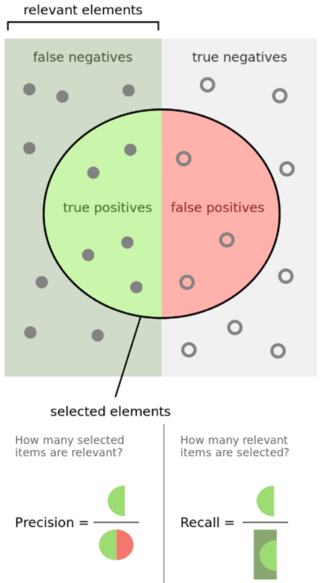

https://towardsdatascience.com/how-to-evaluate-your-machine-learning-models-with-python-code-5f8d2d8d945b

# 6. Matriz de Confusão (“Confusion Matrix”) 

Vamos agora analisar o desempenho sob a ótica da matriz de confusão (um dataset de dígitos).

A matriz de confusão é uma tabela comumente utilizada para descrever o desempenho de um modelo de classificação (ou “classificador”) para um conjunto de dados de teste para os quais se conhece os valores verdadeiros.
A matriz de confusão é dividida em vários quadrantes, sendo que cada quadrante representa uma possível classificação. No caso da regressão logística, existem apenas duas classificações possíveis: 1 ou zero.

O eixo horizontal da matriz representa as classes preditas, enquanto que o eixo vertical representa os valores efetivamente observados. Assim, para cada classe pode ocorrer:

- O algoritmo previu um resultado naquela classe, mas o valor efetivamente observado pertence à outra classe (predição equivocada);
- O algoritmo previu um resultado naquela classe, e o valor efetivamente observado pertence àquela classe (predição correta). São os elementos da diagonal principal da matriz.

Portanto, quanto mais elementos na diagonal principal, mais preciso é o modelo de classificação. Isso porque todos os acertos do modelo (previu a classificação que efetivamente se verificou) se encontram sobre a diagonal principal. Repare que isso se observa porque o eixo vertical é organizado de baixo para cima (ou seja, ele cresce em direção à parte inferior da matriz. Caso ele crescesse de cima para baixo, a diagonal secundária é que seria utilizada).

Se existem n possíveis classificações, teremos n (horizontal) x n (vertical) = n² quadrantes. Como a regressão logística possui apenas n = 2 classificações (1 ou zero), a matriz de confusão será dividida em 2 x 2 = 2² = 4 quadrantes, cada um representando uma das possíveis situações:

1.	Modelo prevê o resultado zero, e se verifica o resultado zero (previsão correta);
2.	Modelo prevê o resultado zero, mas se verifica o resultado 1 (erro do modelo);
3.	Modelo prevê o resultado 1, e se verifica o resultado 1 (previsão correta);
4.	Modelo prevê o resultado 1, mas se verifica o resultado zero (erro do modelo).

Em cada quadrante, a matriz mostra a quantidade de elementos para os quais se verificou cada uma destas situações, e impõe uma escala de cores (mapa de calor) para facilitar a visualização dos dados.

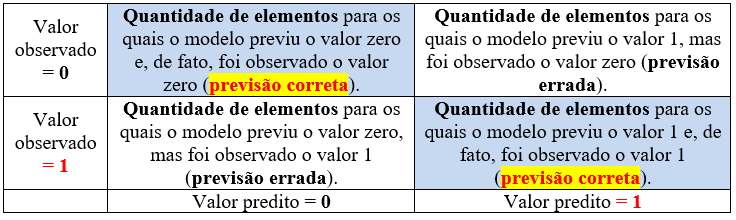

Assim, vamos calcular os valores y_pred_train que o modelo prevê para x_train e, a seguir, construir a matriz de confusão cm_train para estes dados (e faremos o mesmo para os dados de teste).

Ao construir a matriz de confusão, podemos mostrar os números das quantidades de dados em cada quadrante ou não. Para mostrar os números, mantenha annot=True. Caso não deseje vê-los, mude para annot=False. Quando muitas classes estão presentes, é interessante ocultar os números para que o gráfico não fique poluído. Como estamos lidando com apenas 2 classes, manteremos a visualização deles.


In [ ]:
cm_train = metrics.confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(9,9))
sns.heatmap(cm_train, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
#annot = True: shows the number corresponding to each square
#annot = False: do not show the number
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_train)
plt.title(all_sample_title, size = 15);

#Confusion matrix and metrics for the test

cm_test = metrics.confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm_test, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
#annot = True: shows the number corresponding to each square
#annot = False: do not show the number
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_test)
plt.title(all_sample_title, size = 15);

A matriz de confusão é mostrada na janela de Plots:

Neste exemplo
Vemos que a precisão é alta, em 0,67 (o modelo acerta em 67% dos casos).

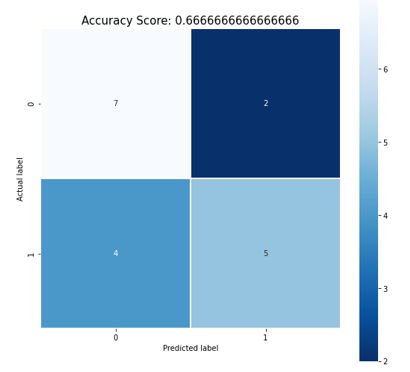

1.	Em 7 ocasiões, o modelo acertou, prevendo o resultado zero (que foi efetivamente observado) – quadrante superior esquerdo (previsão = “Predicted label” = 0, valor real = “Actual label” = 0);
2.	Em 4 ocasiões, o modelo errou, pois previu zero quando o resultado era 1 – quadrante inferior esquerdo (previsão = “Predicted label” = 0, valor real = “Actual label” = 1);
3.	Em 2 ocasiões, o modelo errou, pois previu o resultado 1 quando o resultado era zero – quadrante superior direito (previsão = “Predicted label” = 1, valor real = “Actual label” = 0);
4.	Em 5 ocasiões, o modelo acertou, prevendo o resultado 1 (que foi efetivamente observado) – quadrante inferior direito (previsão = “Predicted label” = 1, valor real = “Actual label” = 1).

Veja que, devido à pequena quantidade de dados no Dataset original, apenas 6 testes foram feitos, resultando na precisão de 0,83. Como a precisão dos testes é superior à do treino, concluímos que não há indicação de “overfitting”. No caso da matriz de confusão obtida para os dados de teste:

1.	Em 3 ocasiões, o modelo acertou, prevendo o resultado zero (que foi efetivamente observado) – quadrante superior esquerdo (previsão = “Predicted label” = 0, valor real = “Actual label” = 0);
2.	Em 1 ocasião, o modelo errou, pois previu zero quando o resultado era 1 – quadrante inferior esquerdo (previsão = “Predicted label” = 0, valor real = “Actual label” = 1);
3.	O modelo não cometeu o erro de prever o resultado 1 quando o resultado era zero nenhuma vez – quadrante superior direito (previsão = “Predicted label” = 1, valor real = “Actual label” = 0);
4.	Em 2 ocasiões, o modelo acertou, prevendo o resultado 1 (que foi efetivamente observado) – quadrante inferior direito (previsão = “Predicted label” = 1, valor real = “Actual label” = 1).

Comparando as duas matrizes, vemos que o modelo aparenta ter poucos resultados falsos positivos: o resultado menos frequente é prever 1 (pessoa possui cartão de crédito), quando na verdade o valor real era zero (pessoa não possui cartão de crédito).

# 7. Gráfico da correlação logística 

Para finalizar o exercício, podemos fazer uma última análise, que é a construção do gráfico da curva logística comparado aos valores experimentais. Note que este gráfico representa no eixo y a probabilidade (entre 0 e 1) e, no eixo X, a variável preditora.

Sendo assim, ele só pode ser construído nesta situação especial na qual existe uma única variável preditora. Isso porque a presença de mais variáveis implicaria múltiplos eixos X – com 2 preditores, a curva seria uma superfície (não uma curva sigmoide) e, com 3 ou mais variáveis, já não há representação geométrica.

Para construir o gráfico, vamos alinhar os pontos experimentais zero e 1 (de modo a melhorar a qualidade do gráfico e verificar o comportamento geral), e organizar os dados em ordem crescente, evitando que a curva crie splines internos que impeçam a visualização. 

Vamos calcular os valores preditos pelo modelo (ter ou não cartão de crédito) e construir o gráfico na forma de uma função degrau, que passará do patamar zero para o patamar 1. Este gráfico será mostrado em vermelho, enquanto que os valores observados serão mostrados em preto. 

Por fim, vamos calcular a probabilidade que a curva logística calcula para cada ponto, evidenciando que, para probabilidades acima de 50%, o modelo fornece o valor 1, enquanto fornece zero para as probabilidades menores que 50%.

In [ ]:
#Correlation graphics
#This graphic only can be obtained for a single-predictor
#That is the only possibility of having a single horizontal axis X
#multiple predictors generate multiple X axes
#Comparison between experimental and the logistic fitting
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
x_graph = np.sort(X, axis=None)
#sort data, avoiding internal splines of the curve
x_graph = np.array(x_graph).reshape(-1, 1)
#reformat for applying the logistic regression calculus
#we are using all of the X data to improve the graphic quality
loss = logisticRegr.predict(x_graph)
plt.step(x_graph, loss, color='red', linewidth=3, label = "Model\npredictions")
loss2 = expit(x_graph * logisticRegr.coef_ + logisticRegr.intercept_).ravel()
#this is the actual probability curve
plt.plot(x_graph, loss2, color='blue', linewidth=3, label = "Logistic/\nProbability\ncurve")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

O gráfico obtido é mostrado na janela de Plots. Para interpretá-lo, lembre-se novamente que o modelo toma como valor 1 todas as probabilidades acima de 50% (valores para os quais o resultado 1 é o mais provável – ou seja, é mais provável que a pessoa possua cartão de crédito), e define como zero todas as probabilidades abaixo de 50% (valores para os quais o resultado zero é o mais provável – ou seja, é mais provável que a pessoa não possua cartão de crédito).

Veja que, ao dividir o gráfico em torno do ponto de probabilidade igual a 50%, ele se torna equivalente à matriz de confusão, porém com a leitura invertida. Isso porque o eixo vertical do gráfico cresce de baixo para cima, enquanto que o da matriz cresce de cima para baixo. 

Assim, os pontos sobre a curva vermelha de predição do modelo são aqueles nos quais o modelo acertou o resultado; enquanto que os pontos destacados por círculos azuis são os de predição equivocada. Veja mais uma vez que há evidência de que o modelo calcula menos falsos positivos, já que apenas 2 pontos estão destacados no quadrante inferior direito (previsão = 1 e resultado = zero).

# 8. Salvar e Carregar (Futuramente) o modelo Machine Learning

A célula a seguir é utilizada para salvar o modelo aprendido, o qual poderá ser utilizado em situações futuras.
O arquivo será salvo no endereço definido em file_address:

file_address = "D:\Drive\FM2S\EAD\Green Belt em Python\Machine Learning - módulo 1 - Regressão Logística\Save and Load ML Models\obtained_model.pmml"

file_address armazena o local em que sera salvo o modelo. Note que o arquivo gerado se chama obtained_model.pmml

O dill permite salvar em qualquer extensao (pkl, sav, pmml, ...)

Este trecho/célula pode ser aplicado a qualquer um dos modelos a serem utilizados, regressão logística, redes neurais para regressão, e redes neurais para classificação.

In [ ]:
import dill

#Definicao da pasta na qual sera salvo o arquivo:
file_address = "D:\Drive\FM2S\EAD\Green Belt em Python\Machine Learning - módulo 1 - Regressão Logística\Save and Load ML Models\obtained_model.pmml"
#file_address armazena o local em que sera salvo o modelo
#note que o arquivo gerado se chama obtained_model.pmml
#o dill permite salvar em qualquer extensao (pkl, sav, pmml, ...)

dill.dump(logisticRegr, open(file_address, 'wb'))
#aqui, modifique logisticRegr pelo nome do modelo declarado. O logisticRegr foi
#utilizado aqui apenas para ilustrar como salvar o modelo gerado a partir de
#um comando como logisticRegr = LogisticRegression(solver = 'lbfgs')

"""
Se o modelo fosse gerado por um comando como
ann_reg = MLPRegressor(solver='adam', hidden_layer_sizes=100, activation='tanh', max_iter=20000).fit(x_train, y_train)

Então o comando utilizado para salvá-lo seria:

dill.dump(ann_reg, open(file_address, 'wb'))

Note que basta substituir o primeiro argumento, que é o nome conferido ao modelo.
"""
 
# Agora vamos carregar o modelo de ML salvo
 
# supondo que o endereco do arquivo continua o mesmo, ou seja,
# file_address = 'D:\Drive\FM2S\EAD\Green Belt em Python\Machine Learning - módulo 1 - Regressão Logística\finalized_model.pmml'

loaded_model = dill.load(open(file_address, 'rb'))
#Agora o modelo carregado  recebe o nome de loaded_model

# 9. Considerações finais e realização de previsões

Agora você desenvolveu seu primeiro algoritmo de inteligência artificial e já está pronto para utilizá-lo para prever se a pessoa terá ou não cartão de crédito. Lembre-se, porém, de que, como todo modelo empírico, a regressão logística só é válida para o intervalo para o qual ela foi regredida.

Isto significa que, caso você fosse aplicar o modelo deste exercício, a pessoa analisada deve ter uma renda entre o intervalo min(X) e max(X), onde min(X) é a menor renda observada, e max(X) é a maior renda observada. Podemos obter estes valores digitando no Console, e apertando Enter a cada linha:

Ou seja, o modelo pode ser aplicado a pessoas com renda entre 495,00 até 1651,50. Se seu modelo utiliza várias variáveis preditoras, a análise só poderá ser efetuada para indivíduos que estejam dentro dos intervalos (min, max) de todas as variáveis simultaneamente.

Novamente, para verificar se o indivíduo deve ou não possuir o cartão de crédito (de acordo com nosso modelo), siga os passos descritos ao fim do tópico 4, quando afirmamos que já possuíamos um modelo funcional. O caso que utilizamos aqui é:

# Caso 1: existe apenas uma variável preditora
Novamente, temos que fazer uma correção de formato, já que a lista das variáveis possuirá apenas uma linha e uma coluna. Cálculo da regressão logística para esse elemento (resultado zero ou 1, possui  ou não possui cartão): yi = logisticRegr.predict(np.array(X[i]).reshape(1,-1)) ou yi = logisticRegr.predict(np.array(individuo_1[0]).reshape(1,-1))

Você pode digitar novas linhas de código ou ir diretamente ao console e digitar os comandos (obviamente, não limpe a memória, ou perderá o modelo).

Como exemplo, vamos resolver a pergunta final do enunciado. O indivíduo a ser analisado possui uma renda de 1050,27, valor dentro do intervalo (min, max). Calculamos, então, a regressão logística para este indivíduo diretamente no console:

Veja que a previsão do modelo é o valor 1, ou seja, de acordo com nosso modelo, o individuo_1 testado, que apresenta renda igual a 1050.27, deve possuir cartão de crédito (ou seja, o cartão não será oferecido a ele, e devemos procurar outra pessoa que não deve ter cartão ainda para oferecer o produto).

Repare que este resultado concorda com os gráficos da Seção 7 (Ufa! Caso contrário, teríamos um problema sério de o modelo estar prevendo múltiplas respostas – isso indicaria erro no código), pois a renda 1 está após a probabilidade de 50%.

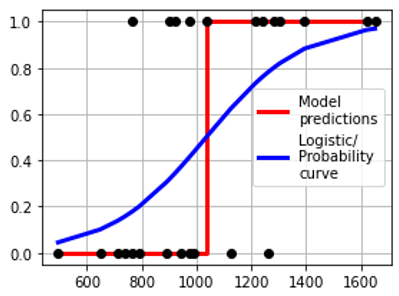

# Outros resultados

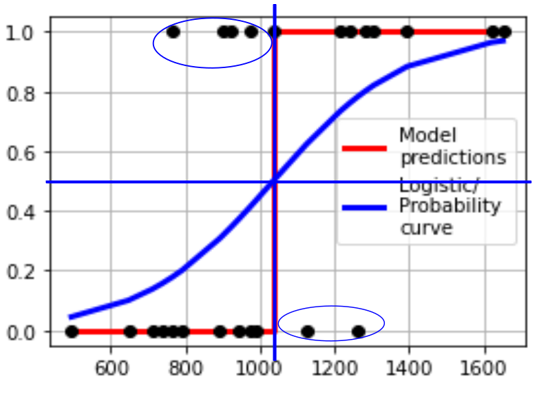

Este gráfico evidencia para nós uma facilidade de análise que está presente apenas no caso simples de uma única variável preditora: neste caso, não precisamos calcular o modelo para o ponto específico (indivíduo que desejamos analisar). Basta tomarmos novamente o gráfico:

Se, para a renda do indivíduo analisado, a curva vermelha já está no patamar 1, então o modelo prevê que o indivíduo possui cartão de crédito. Isso será verificado para todas as rendas à direita da marcação de probabilidade igual a 0,50.

Caso a curva ainda esteja no patamar zero (porção inicial da curva degrau vermelha), então a previsão do modelo é que o indivíduo não possui cartão de crédito. Isso será verificado para todas as rendas à esquerda da marcação de probabilidade igual a 0,50.